In [13]:
import seaborn as sns 

In [1]:
# I'll start by using the function I built to clean and process the data 
import project_functions
from pandas_profiling import ProfileReport
df = project_functions.clean_and_process('/Users/evanlewis/data301/Project/project-group53-project/data/raw/PRWI_Data.csv')
df

,Site,Year,Species,Temperature,Temp_Range
0,PRWI 2,2007,Eastern Wood-Pewee,18.5,10-20
1,PRWI 2,2007,Red-eyed Vireo,18.5,10-20
2,PRWI 2,2007,American Goldfinch,18.5,10-20
3,PRWI 2,2007,Ovenbird,18.5,10-20
4,PRWI 2,2007,Eastern Tufted Titmouse,18.5,10-20
...,...,...,...,...,...
29106,PRWI 22,2017,Eastern Tufted Titmouse,21.0,20-30
29107,PRWI 22,2017,Hairy Woodpecker,21.0,20-30
29108,PRWI 22,2017,Red-eyed Vireo,21.0,20-30
29109,PRWI 22,2017,American Robin,21.0,20-30


In [2]:
# Using .describe to get an idea of how the temperature variable is distributed
df.describe()

,Year,Temperature
count,29111.000000,29111.000000
mean,2011.920271,21.065628
std,3.115370,3.713147
min,2007.000000,0.000000
25%,2009.000000,19.000000
50%,2012.000000,21.400000
75%,2014.000000,23.400000
max,2017.000000,40.900002


In [3]:
# This shows me the unique values for each column, I was mostly interested in seeing how many total species there are
df.nunique(axis=0)

Site            22
Year            11
Species        116
Temperature    195
Temp_Range       5
dtype: int64

In [4]:
#going to start with some plots to get an idea of trends in the data. 

temp_by_year = df[['Temperature', 'Year']]
temp_by_year = temp_by_year.groupby('Year', as_index = False).mean()
temp_by_year

,Year,Temperature
0,2007,20.644052
1,2008,19.761916
2,2009,17.421895
3,2010,21.752809
4,2011,23.127175
5,2012,23.514251
6,2013,22.107407
7,2014,18.873539
8,2015,21.097082
9,2016,23.375590


<AxesSubplot:xlabel='Year', ylabel='Temperature'>

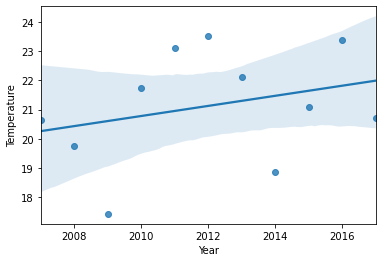

In [29]:
#going to use reggression plots to show a trend, I recognize that the trend is visual, and likely not significant but I feel that's outside the scope of the class
sns.regplot(data=temp_by_year, y = 'Temperature', x='Year')

### This shows an upward trend in temperatures, as expected.

<AxesSubplot:xlabel='Year', ylabel='Species'>

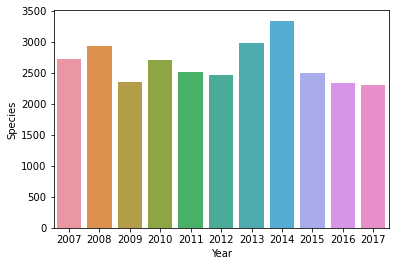

In [41]:
# Now I want to see what the trend in observations over the years is, using a count of species as the index 

yearly_observations = df[['Year','Species']]
yearly_observations = yearly_observations.groupby('Year', as_index = False).count()
sns.barplot(data=yearly_observations, x='Year', y='Species')

<AxesSubplot:xlabel='Year', ylabel='Species'>

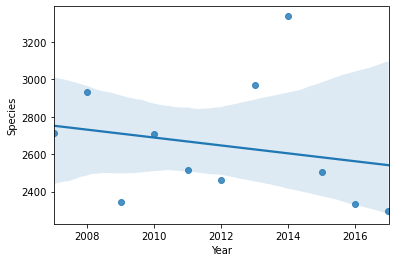

In [42]:
#No obvious trend in the bar plot, but a regression may show a trend 
sns.regplot(data=yearly_observations,x='Year',y='Species')

### A downward trend that seems fairly correlated with the temp chart, even the 2014 data point is very high on a cooler year. Neat

<AxesSubplot:xlabel='Temp_Range', ylabel='Species'>

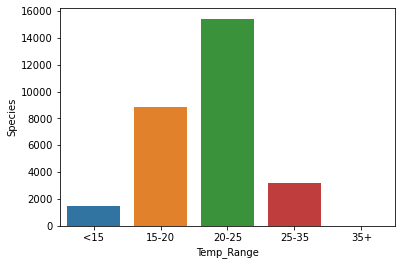

In [53]:
#going to try and see if my temperature classes give any insight

obs_class = df[['Temp_Range','Species']]
obs_class = obs_class.groupby('Temp_Range', as_index=False).count()
sns.barplot(data=obs_class, x='Temp_Range', y='Species')

I was excited to see this plot, where a large majority of the observations are in the cooler temp ranges. Then I realized this is a base rate fallacy, and has nothing to do with the likeliness of observing a bird based on temperature. Oops!

### I feel like this has given me a good enough idea of what I'm looking at and what to focus on to answer my question, so i am going to end the EDA here and move on to the Full analysis

# EDA Complete